<a href="https://colab.research.google.com/github/DeepCodeSec/ml1000-p3/blob/milestone3code/notebooks/group_1_project_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 1 Project

In [1]:
##@title Data Source
datafile = "./data-sample-clean-20K.csv" #@param {type:"string"}

In [2]:
import pandas as pd

# Load the pre-processed data into the df_features dataframe
df = pd.read_csv(datafile, sep=',')
print(f"Dataset '{datafile}' contains {df.shape[0]} row(s) and {df.shape[1]} column(s).")

Dataset './data-sample-clean-20K.csv' contains 8205 row(s) and 25 column(s).


In [3]:
# Drop 'Unnamed: 0' columns
if 'Unnamed: 0' in df:
  df.drop('Unnamed: 0', axis=1, inplace=True)

## 1. Classification without PyCaret

In [4]:
df_features1 = df

### Classification with TF-IDF and SVM

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.svm import LinearSVC
clf = LinearSVC()

import matplotlib.pyplot as plt

import numpy as np # linear algebra

In [6]:
text_clean = df_features1['text_clean']
y = df_features1['classification']

In [7]:
# convert to feature vector
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(text_clean)

In [8]:
def run_svm(clf, x_train, y_train, x_test, y_test):
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)

  print()
  print('classification_report')
  print(classification_report(y_test, y_pred))

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state= 0, stratify = y)

In [10]:
run_svm(clf, x_train, y_train, x_test, y_test)


classification_report
              precision    recall  f1-score   support

      benign       0.94      0.87      0.90       449
   malicious       0.95      0.98      0.97      1192

    accuracy                           0.95      1641
   macro avg       0.95      0.93      0.93      1641
weighted avg       0.95      0.95      0.95      1641



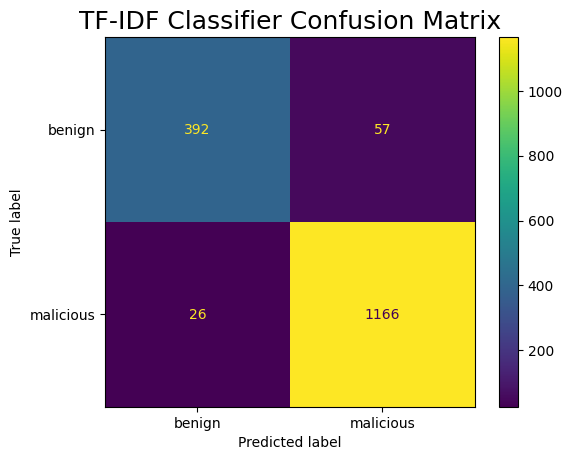

In [11]:
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()

plt.title('TF-IDF Classifier Confusion Matrix', fontsize=18)
plt.show()

Notes: This model has a false negative of 2.1% (that is, 2.1% of malicious websites were predicted as benign).




### Classification with Word2Vec using SVM


#### Load spaCy

In [12]:
import spacy
nlp = spacy.load("en_core_web_sm")

#### Create function to get vector

In [13]:
def get_vector(x):
  doc = nlp(x)
  vec = doc.vector
  return vec

In [14]:
df_text_vector = df_features1[['text_clean', 'classification']].copy()
df_text_vector['vec'] = df_features1['text_clean'].apply(lambda x: get_vector(x))

In [15]:
df_text_vector['vec'].head()

0    [-0.06788156, -0.6876611, 0.21952553, 0.032213...
1    [-1.3439258, -0.030285632, -0.677123, 0.185680...
2    [0.04835267, -0.36837226, -0.010857895, 0.1325...
3    [-0.38135976, -0.84059876, -0.1808308, 0.20382...
4    [-0.12770301, -0.65242547, -0.23951934, 0.2998...
Name: vec, dtype: object

#### Convert vector in numpy arrary

In [16]:
x = df_text_vector['vec'].to_numpy()
x = x.reshape(-1,1)  ## adjust in one column with as row as required

In [17]:
x.shape

(8205, 1)

In [18]:
# 96 shape
x = np.concatenate(np.concatenate(x, axis=0), axis = 0).reshape(8205, 96)

In [19]:
x.shape

(8205, 96)

In [20]:
y = df_text_vector['classification']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 0, stratify = y)

In [22]:
def run_svm(clf, x_train, y_train, x_test, y_test):
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)

  print()
  print('classification_report')
  print(classification_report(y_test, y_pred))

In [23]:
from sklearn.svm import LinearSVC
clf = LinearSVC()

In [24]:
run_svm(clf, x_train, y_train, x_test, y_test)


classification_report
              precision    recall  f1-score   support

      benign       0.85      0.68      0.75       449
   malicious       0.89      0.95      0.92      1192

    accuracy                           0.88      1641
   macro avg       0.87      0.82      0.84      1641
weighted avg       0.88      0.88      0.87      1641



/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


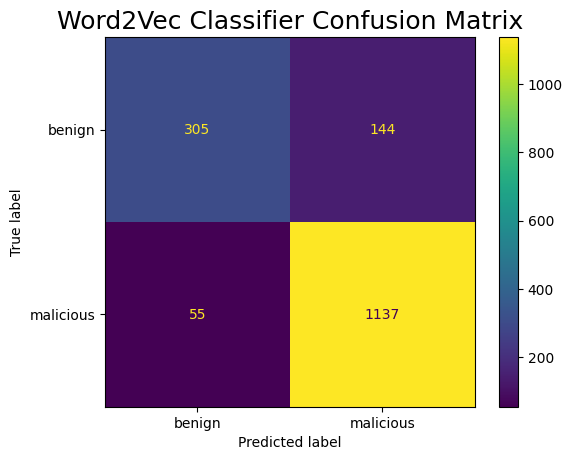

In [25]:
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()

plt.title('Word2Vec Classifier Confusion Matrix', fontsize=18)
plt.show()

This model had a false negative of 4.6% so 4.6% of all malicious websites were predicted as benign

### Create a CountVectorizer

#### Create Bag-of-Words

In [26]:
# Creating Bag-of-Words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 96)
x_test = cv.fit_transform(text_clean).toarray()

print(x_test.shape)

(8205, 96)


In [27]:
# splitting the training data into train and valid sets
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [28]:
# Standardization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

### Classification with Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)

Training Accuracy : 0.9806520414381474
Validation Accuracy : 0.9305301645338209


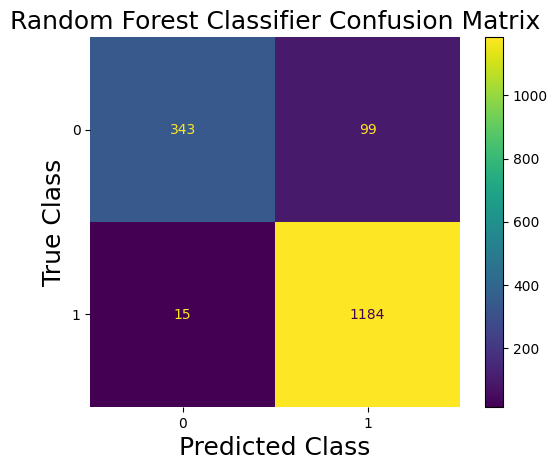

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.axis()
plt.grid(False)
plt.box(False)
plt.xlabel('Predicted Class', fontsize=18)
plt.ylabel('True Class', fontsize=18)
plt.title('Random Forest Classifier Confusion Matrix', fontsize=18)
plt.show()

### Classification with Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)

Training Accuracy : 0.8785801340645948
Validation Accuracy : 0.8775137111517367


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


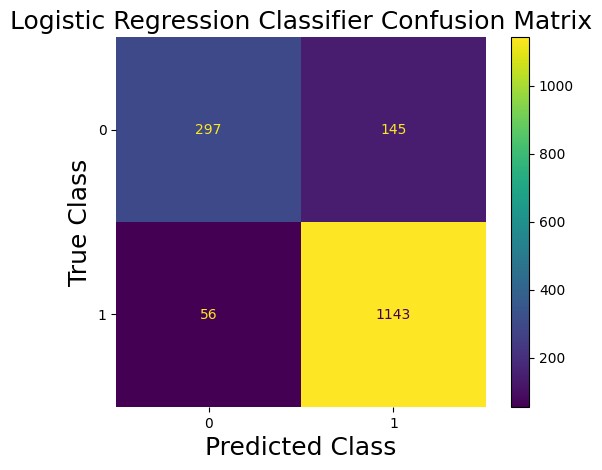

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.axis()
plt.grid(False)
plt.box(False)
plt.xlabel('Predicted Class', fontsize=18)
plt.ylabel('True Class', fontsize=18)
plt.title('Logistic Regression Classifier Confusion Matrix', fontsize=18)
plt.show()

### Classification with Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)

Training Accuracy : 0.9806520414381474
Validation Accuracy : 0.8933577087141986


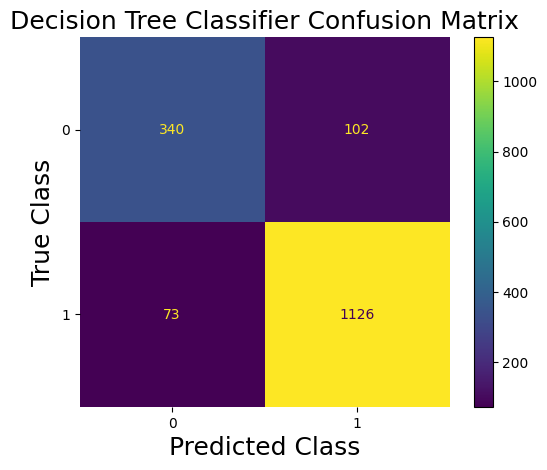

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.axis()
plt.grid(False)
plt.box(False)
plt.xlabel('Predicted Class', fontsize=18)
plt.ylabel('True Class', fontsize=18)
plt.title('Decision Tree Classifier Confusion Matrix', fontsize=18)
plt.show()

### Classification with Support Vector Classification

In [35]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)

Training Accuracy : 0.9482023156611822
Validation Accuracy : 0.931139549055454


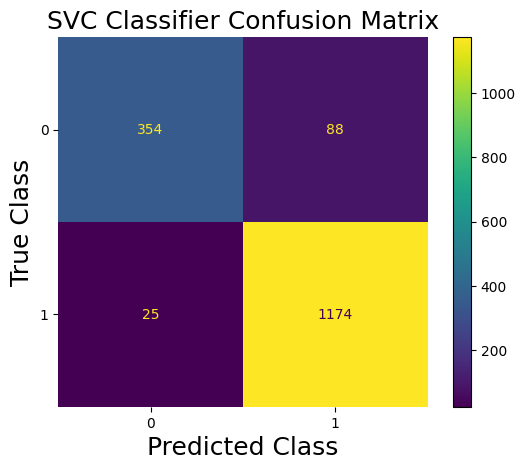

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.axis()
plt.grid(False)
plt.box(False)
plt.xlabel('Predicted Class', fontsize=18)
plt.ylabel('True Class', fontsize=18)
plt.title('SVC Classifier Confusion Matrix', fontsize=18)
plt.show()

Summary:
*   SVM with TF-IDF Accuracy = 0.95
*   SVM with Word2Vec Accuracy = 0.87
*   Random Forest Accuracy = 0.87
*   Logistic Regression Accuracy = 0.98
*   Decision Tree Accuracy = 0.95
*   SVC Accuracy = 0.94

Since our best method was Logistic Regression we will continue the experiment with PyCaret. This lets us easily fix our imbalance, normalize our data and handle any multicollinearity. We also plan on adding all relevant bigrams and trigrams as features.

## 2. Classification with PyCaret

In [37]:
df_features2 = df

### Model Generation

With the `DataFrame` containing all the features generated, we use to generate a model to match the label defined in the `classification` column.

In [38]:
###@title Classifier Options
sid = 1337 #@param {type:"integer"}
training_size = 0.85 #@param { type:"number" }

To avoid generating the "Numba needs NumPy 1.20 or less" exception, we ensure the numba package is upgraded before doing anything else.

In [39]:
%%capture
!pip install numba --upgrade

### Create the Classifier

We can then generate our classifier object using the following options:
* `transformation`.
* `normalize`.
* `fix_imbalance`. Since we have more sites labeled as malicious, we ask `pycaret` to consider potential sample imbalances.
* `remove_multicollinearity`. Remove features with the inter-correlations higher than the defined threshold of 0.95.

In [40]:
%%capture
!pip install pycaret

In [41]:
from pycaret.classification import *

# Create a PyCaret Classification experiment
s = setup(data=df_features2,
          session_id=sid,
          transformation=True, #applies the power transform to make data more Gaussian-like
          normalize=True, #transforms the numeric features by scaling them to a given range (default is z-score)
          fix_imbalance=True, # SMOTE (Synthetic Minority Over-sampling Technique) is applied to create synthetic datapoints for minority class.
          remove_multicollinearity=True, #features with the inter-correlations higher than the defined threshold are removed
          multicollinearity_threshold = 0.95,
          train_size=training_size,
          target="classification"
          )

,Description,Value
0,Session id,1337
1,Target,classification
2,Target type,Binary
3,Target mapping,"benign: 0, malicious: 1"
4,Original data shape,"(8205, 24)"
5,Transformed data shape,"(11361, 24)"
6,Transformed train set shape,"(10130, 24)"
7,Transformed test set shape,"(1231, 24)"
8,Numeric features,21
9,Categorical features,2


### Select Model

In [42]:
# Compare multiple models and select the best
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9381,0.9610,0.9718,0.9447,0.9580,0.8403,0.8420,0.4510
et,Extra Trees Classifier,0.9338,0.9595,0.9653,0.9449,0.9549,0.8302,0.8312,0.3700
knn,K Neighbors Classifier,0.9239,0.9335,0.9524,0.9434,0.9479,0.8068,0.8072,0.3610
ridge,Ridge Classifier,0.9117,0.0000,0.9392,0.9393,0.9392,0.7777,0.7779,0.2750
lda,Linear Discriminant Analysis,0.9117,0.9587,0.9392,0.9393,0.9392,0.7777,0.7779,0.2320
lr,Logistic Regression,0.9107,0.9608,0.9275,0.9484,0.9378,0.7794,0.7802,0.6460
svm,SVM - Linear Kernel,0.9055,0.0000,0.9242,0.9447,0.9342,0.7667,0.7681,0.2860
dt,Decision Tree Classifier,0.8969,0.8849,0.9126,0.9436,0.9274,0.7495,0.7522,0.3300
xgboost,Extreme Gradient Boosting,0.8919,0.9536,0.8983,0.9504,0.9231,0.7412,0.7464,0.2120
gbc,Gradient Boosting Classifier,0.8755,0.9567,0.8825,0.9429,0.9108,0.7052,0.7122,0.3070


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

During the comparison, the top 2 classifier identified by `pycaret` are the _rf_ and _et_ classifiers. The _rf_ classifier reached an accuracy of 94.6%, a recall of 97.5% and precision of 95.2%. The _et_ classifier obtained 94.4% accuracy, a 97.3% recall but has a precision rate at 95.2%. The _rf_ and the _et_ classifier have very similar scores therefore further investigation is required to select one.

#### Random Forest Classifier

In [43]:
#evaluate_model(m_rf)

In [44]:
m_rf = create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9370,0.9678,0.9645,0.9495,0.9569,0.8393,0.8397
1,0.9456,0.9788,0.9744,0.9518,0.9630,0.8603,0.8612
2,0.9355,0.9507,0.9763,0.9375,0.9565,0.8321,0.8346
3,0.9298,0.9562,0.9566,0.9473,0.9519,0.8220,0.8221
4,0.9412,0.9500,0.9842,0.9380,0.9605,0.8453,0.8491
5,0.9254,0.9357,0.9783,0.9235,0.9501,0.8029,0.8081
6,0.9369,0.9684,0.9605,0.9529,0.9567,0.8403,0.8404
7,0.9570,0.9759,0.9881,0.9542,0.9709,0.8886,0.8905
8,0.9426,0.9671,0.9684,0.9533,0.9608,0.8539,0.8542


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

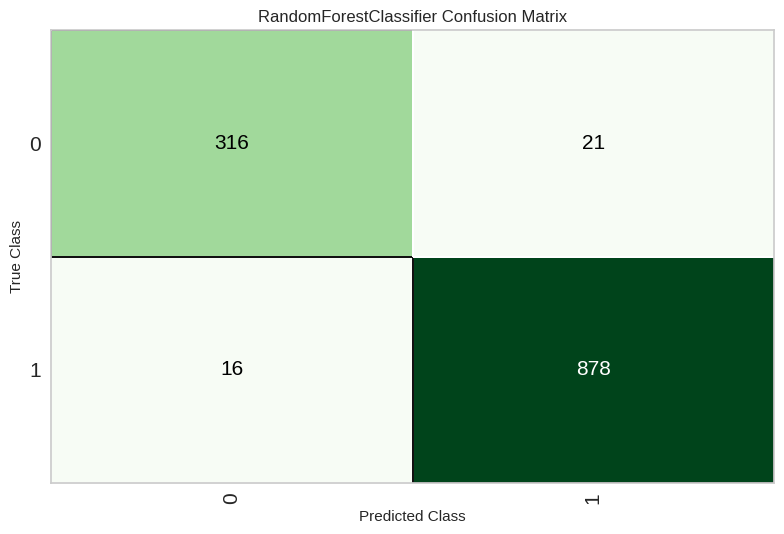

In [45]:
# plot confusion matrix
plot_model(m_rf, plot = 'confusion_matrix')

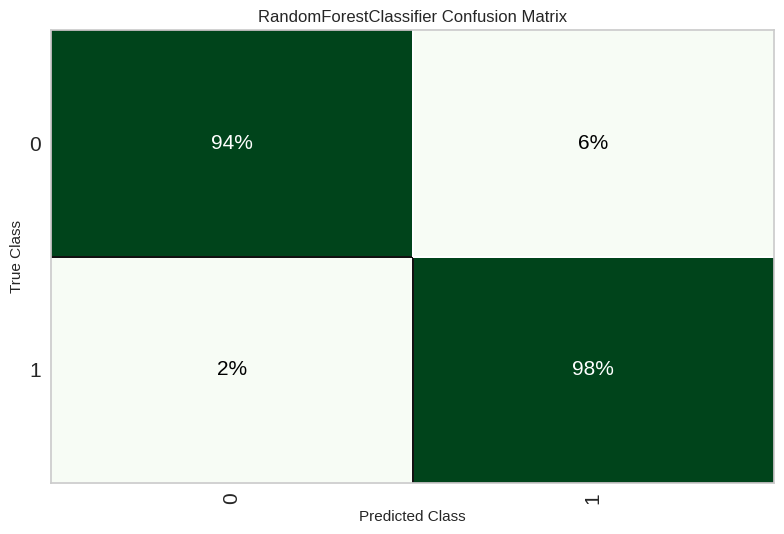

In [46]:
# plot confusion matrix
plot_model(m_rf, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

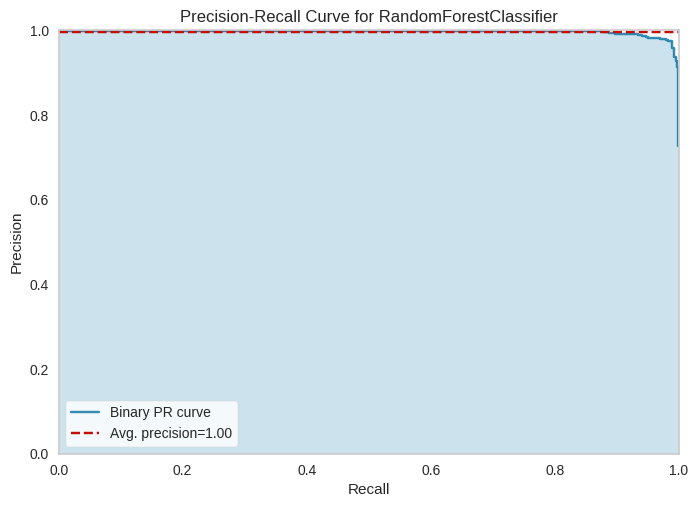

In [47]:
plot_model(m_rf, plot = 'pr')

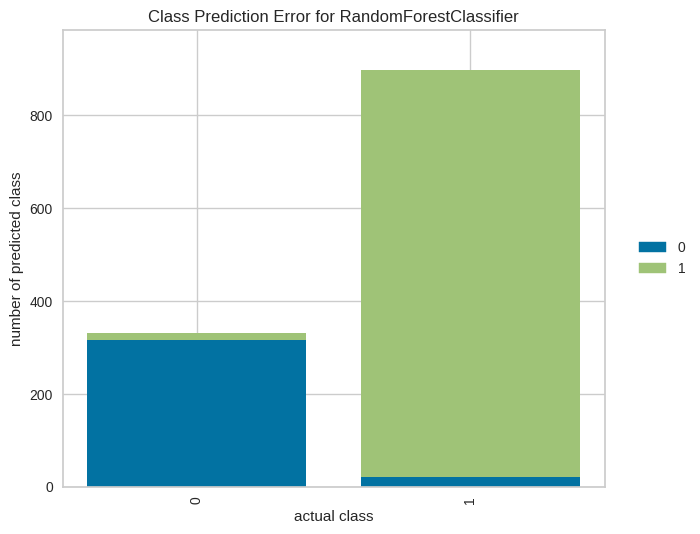

In [48]:
# plot error
plot_model(m_rf, plot = 'error')

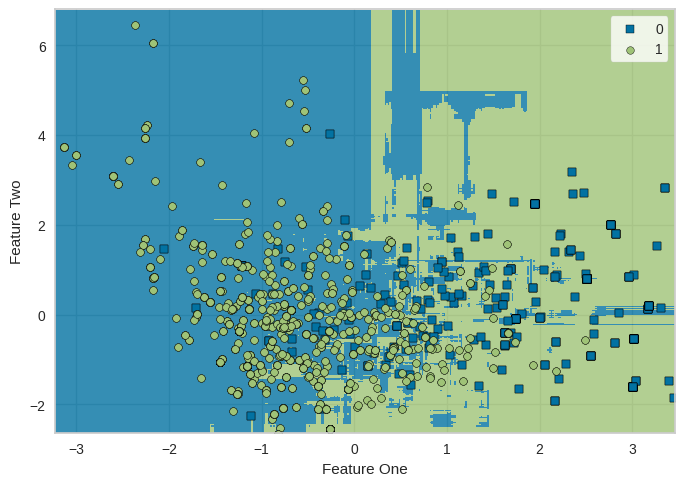

In [49]:
# plot boundary
plot_model(m_rf, plot = 'boundary', use_train_data = True)

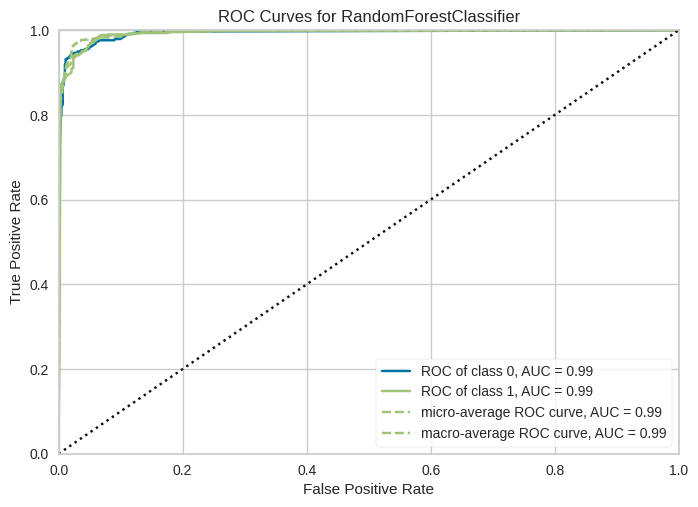

In [50]:
# plot AUC
plot_model(m_rf, plot = 'auc')

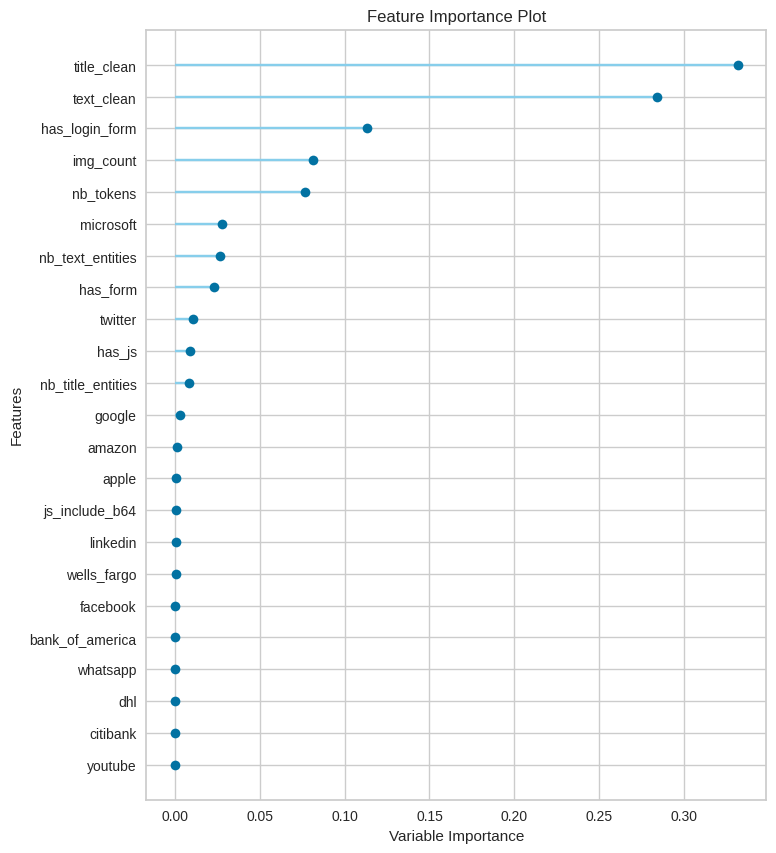

In [51]:
# plot feature importance all
plot_model(m_rf, plot = 'feature_all')

#### Extra Trees Classifier

In [52]:
#evaluate_model(m_et)

In [53]:
m_et = create_model("et")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9327,0.9515,0.9566,0.9510,0.9538,0.8298,0.8298
1,0.9427,0.9845,0.9704,0.9516,0.9609,0.8534,0.8540
2,0.9255,0.9565,0.9704,0.9301,0.9498,0.8056,0.8084
3,0.9241,0.9616,0.9527,0.9434,0.9480,0.8074,0.8076
4,0.9412,0.9549,0.9763,0.9447,0.9602,0.8474,0.8491
5,0.9182,0.9486,0.9684,0.9228,0.9450,0.7857,0.7892
6,0.9354,0.9559,0.9565,0.9546,0.9556,0.8375,0.8375
7,0.9527,0.9670,0.9783,0.9574,0.9677,0.8788,0.8795
8,0.9369,0.9588,0.9625,0.9512,0.9568,0.8398,0.8400


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

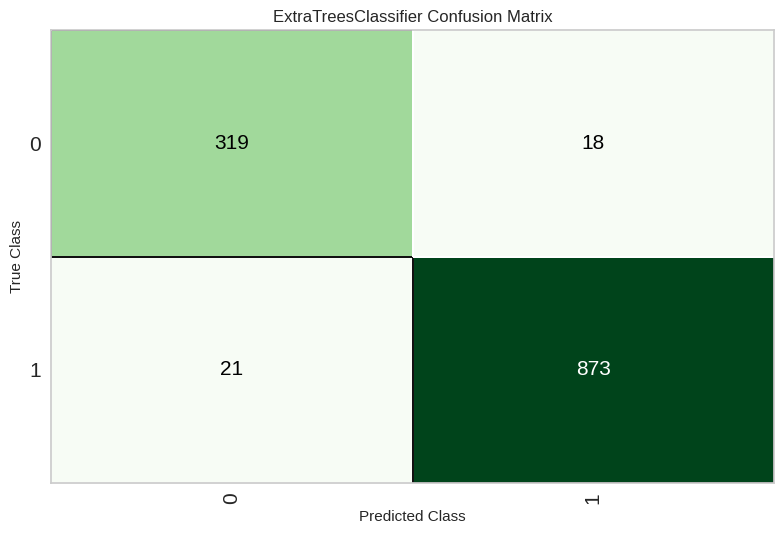

In [54]:
# plot confusion matrix
plot_model(m_et, plot = 'confusion_matrix')

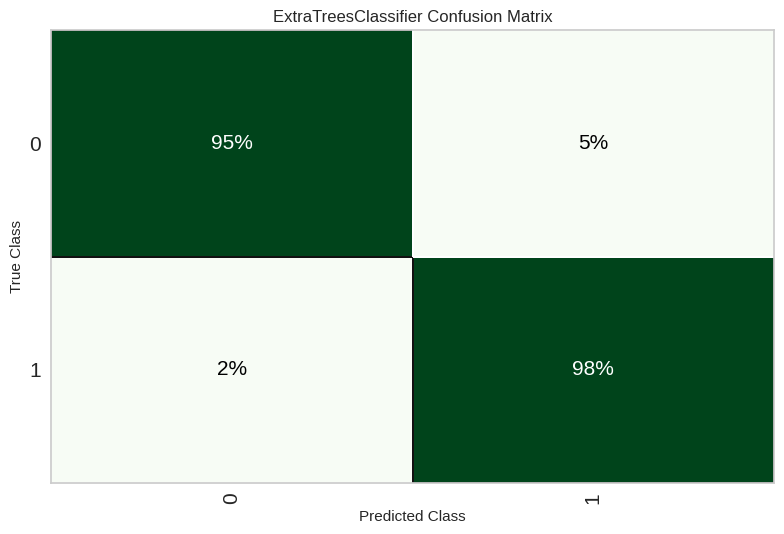

In [55]:
# plot confusion matrix
plot_model(m_et, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

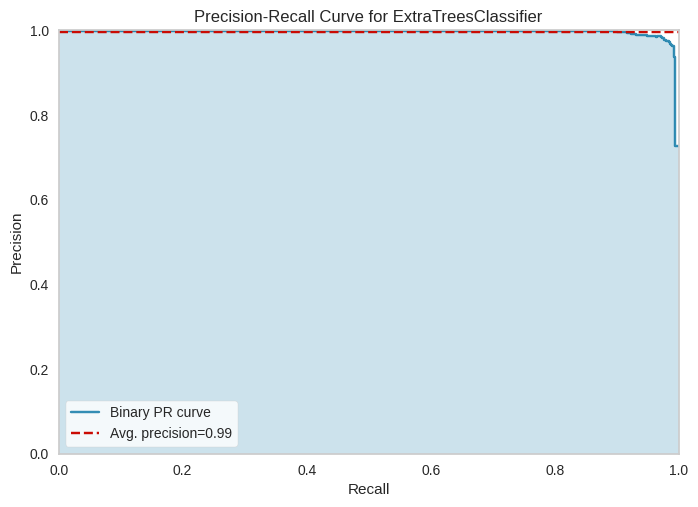

In [56]:
plot_model(m_et, plot = 'pr')

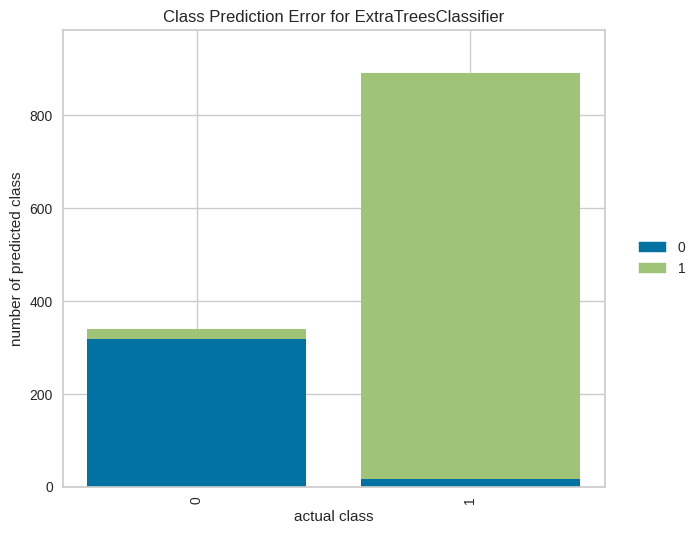

In [57]:
# plot error
plot_model(m_et, plot = 'error')

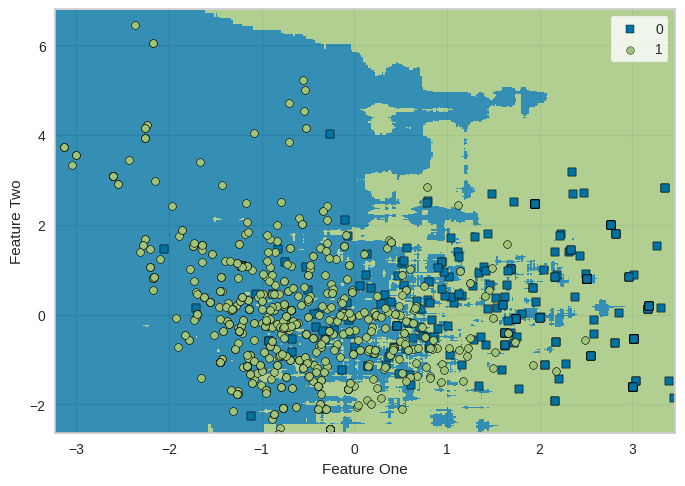

In [58]:
# plot boundary
plot_model(m_et, plot = 'boundary', use_train_data = True)

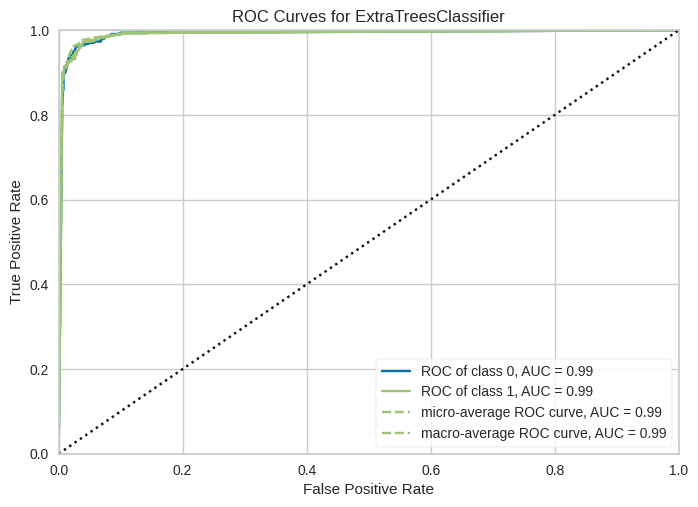

In [59]:
# plot AUC
plot_model(m_et, plot = 'auc')

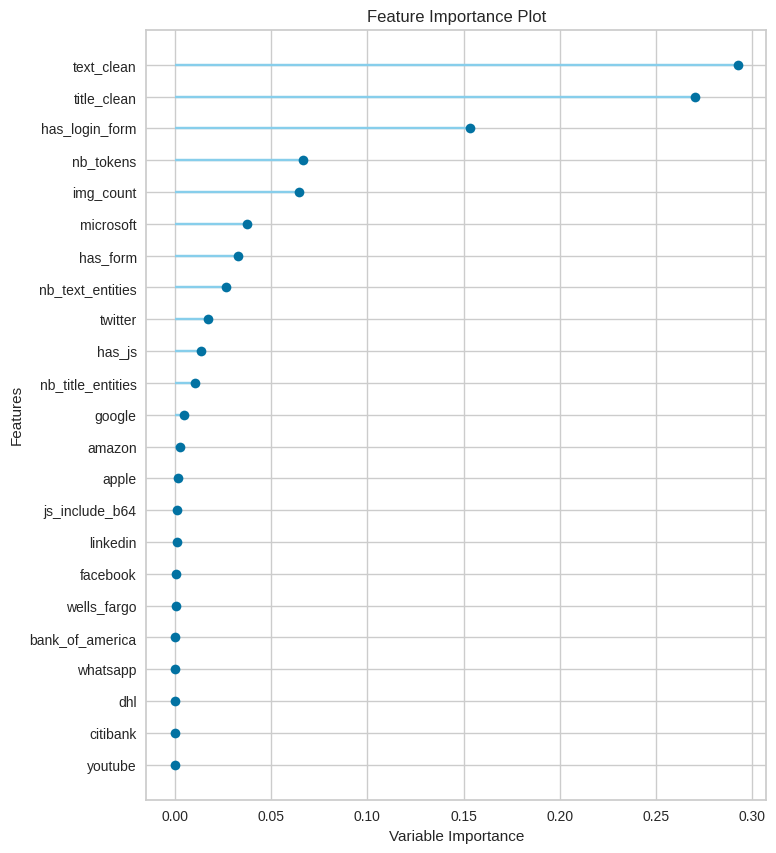

In [60]:
# plot feature importance all
plot_model(m_et, plot = 'feature_all')

### Finalize Model

Some of the key observations made by comparing the _rf_ and _et_ models are enumerated here:
* **Accuracy** is the percentage of correct classifications that a trained machine learning model achieves. _rf_ was slightly more accurate then _et_.
* **AUC** (Area under the ROC Curve) provides an aggregate measure of performance across all possible classification thresholds. _rf_ had a slightly higher AUC then _et_.
* **Recall** measures the proportion of actual positive labels correctly identified by the model. _rf_ had a slightly higher then _et_.
* **Precision** refers to the number of true positives divided by the total number of positive predictions. _rf_ had a slightly higher Precision then _et_.
* **F1** score is a metric used to measure the performance of classification machine learning models. A value greater than 0.9 is considered very good. _rf_ had a slightly better F1 score then _et_.
* The **Kappa** score is defined as the metric used to measure the performance of machine learning classification models based on assessing the perfect agreement and agreement by chance between the two raters. A kappa greater than 0.75 represents excellent agreement. Both had a kappa greater than 0.8 while _rf_ had a slightly better kappa then _et_.
* **MCC** (Matthew's correlation coefficient) is used to gauge or measure the difference between the predicted values and actual values. _rf_ had a slightly better MCC then _et_.
* Both confusion matrices were very similar and are both tilted towards the detection of malicious websites. _rf_ had slightly better results than _et_.


Since both confusion matrices were very similar and the _rf_ model had a slightly higher Accuracy, Recall, Precision, F1, Kappa and MCC, we select the _rf_ model going forward. Again, it is important to reiterate that the small sample size is very likely affecting the current results, and the full sample set would be used in the end-product, possibly resulting in the selection of a different model.


In [61]:
# display best_model
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=1337, verbose=0, warm_start=False)

In [62]:
# Finalize the best model
final_model = finalize_model(tune_model(best_model, choose_better=True)) # the returned object is always better performing

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9384,0.9745,0.9606,0.9549,0.9577,0.8443,0.8443
1,0.9370,0.9803,0.9625,0.9513,0.9569,0.8399,0.8401
2,0.9284,0.9633,0.9724,0.9319,0.9517,0.8131,0.8159
3,0.9183,0.9608,0.9546,0.9344,0.9444,0.7908,0.7915
4,0.9211,0.9514,0.9606,0.9330,0.9466,0.7960,0.7972
5,0.9197,0.9508,0.9684,0.9245,0.9459,0.7898,0.7931
6,0.9082,0.9713,0.9150,0.9566,0.9354,0.7772,0.7795
7,0.9498,0.9783,0.9763,0.9555,0.9658,0.8715,0.8722
8,0.9297,0.9706,0.9565,0.9472,0.9518,0.8219,0.8220


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
